# At what phase of the flight is the most damage occuring?

Compare damage happening within each phase of flight

	#Aircraft_damage
    #Phase_of_Flight

# At what phase of the flight are the most injuries occuring?

Compare each set of injuries with Phase of Flight

	#Total_Fatal_Injuries
	#Total_Serious_Injuries
	#Total_Minor_Injuries
	#Total_Uninjured

	#Injury_severity
    
    Injury severity??
    




## Import Packages and Data

In [3]:
#Import Packages

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
#Import Data

planes = pd.read_csv('Clean_AviationIII.csv')

## Inspect Data

In [5]:
#Inspect data
planes.head()

,Event_Id,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,...,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Phase_of_Flight,Make_Model,Total_Injuries,Total_Passengers,created_year
0,20001218X45446,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal,Destroyed,NaN,Cessna,180,...,4.0,0.0,0.0,0.0,IMC,Unknown,Cessna 180,0.0,4.0,1981
1,20020909X01562,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Cessna 140,0.0,2.0,1982
2,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,0.0,0.0,0.0,2.0,IMC,Landing,Cessna 401B,0.0,2.0,1982
3,20020909X01560,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,NaN,North american,NAVION L-17B,...,0.0,0.0,3.0,0.0,IMC,Cruise,North american NAVION L-17B,3.0,3.0,1982
4,20020909X01559,FTW82DA034,1982-01-01,"HOBBS, NM",United States,Non-Fatal,Substantial,NaN,Piper,PA-28-161,...,0.0,0.0,0.0,1.0,VMC,Approach,Piper PA-28-161,0.0,1.0,1982


In [6]:
planes.shape

(64811, 23)

## Check out Phase_of_Flight and Aircraft Damage

In [7]:
planes['Phase_of_Flight'].value_counts()

Unknown        14479
Landing        13415
Takeoff        10069
Cruise          8498
Maneuvering     6403
Approach        5283
Taxi            1662
Climb           1584
Descent         1461
Go-around       1227
Standing         652
Other             78
Name: Phase_of_Flight, dtype: int64

In [8]:
planes['Aircraft_Damage'].value_counts()

Substantial    49354
Destroyed      13716
Minor           1741
Name: Aircraft_Damage, dtype: int64

## Plot Aircraft Damage by Phase of Flight

In [9]:
planesII = planes.copy()

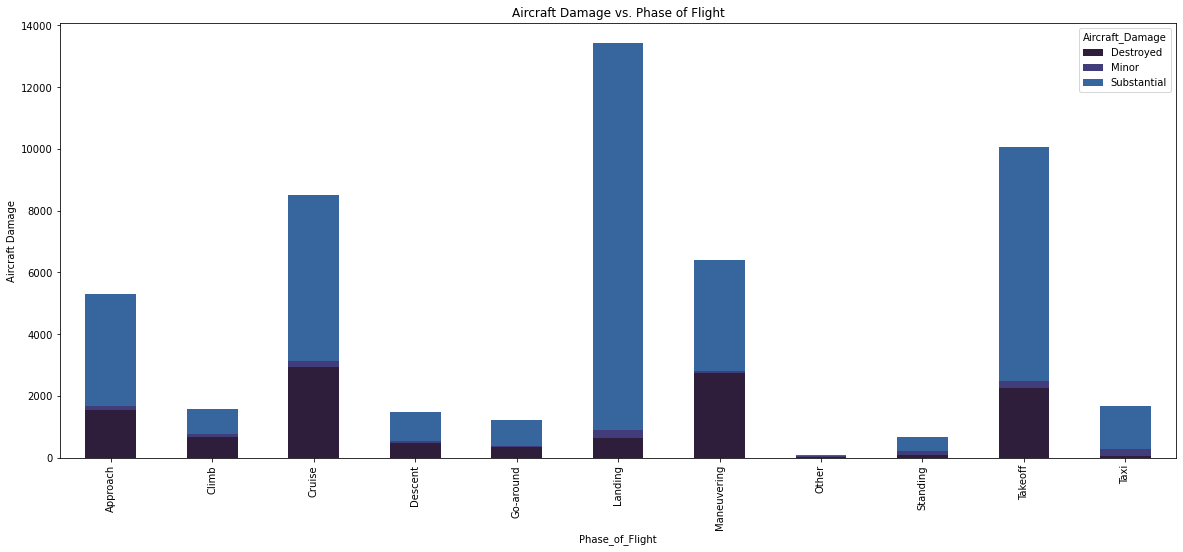

In [13]:
#Should we drop unknown?

#noUNK = planes[planes['Phase_of_Flight'] != 'Unknown'] #remove unknowns from data

pohad = noUNK.groupby(['Phase_of_Flight', 'Aircraft_Damage']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize=(20, 8))
sns.set_palette('mako')

plt.xlabel("Phase of Flight")
plt.ylabel("Aircraft Damage")
#plt.xticks(rotation = 45)
plt.title("Aircraft Damage vs. Phase of Flight")

pohad.plot(kind = 'bar', stacked = True, ax = ax);

## observations 
the most damage occurs during landing - mostly substantial
	by substantial, damage prohibits the aircraft from flying -- most damage in landing -perhaps landing gear -- must be fixed before flying again  
the most destroying damage happend on both cruise, takeoff, and maneuvering
no aircrafts (or very little) aircrafts seem to be destroyed during taxi
other seems to be least occuring/unrelevant



In [15]:
#make pivot table - perhaps for csv export?

POH_damage = pd.pivot_table(planes, columns = ['Aircraft_Damage'], index = 'Phase_of_Flight', aggfunc = 'size')

#convert to dataframe
#
POH_damage_df = POH_damage.reset_index()
POH_damage_df = POH_damage_df.set_index('Phase_of_Flight')

#drop unknown column
#POH_damage_df.drop(columns = 'Unknown', inplace = True)

#check
POH_damage_df



Aircraft_Damage,Destroyed,Minor,Substantial
Phase_of_Flight,,,
Approach,1537,139,3607
Climb,663,88,833
Cruise,2943,199,5356
Descent,466,54,941
Go-around,355,13,859
Landing,635,268,12512
Maneuvering,2746,42,3615
Other,27,7,44
Standing,91,117,444


## Plot Injuries by Phase of Flight

In [16]:
#make total injuries column
planes['Total_Injuries'] = (planes['Total_Fatal_Injuries'] + 
                                  planes['Total_Minor_Injuries'] +
                                 planes['Total_Serious_Injuries'])

#check
planes.head()

,Event_Id,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,...,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Phase_of_Flight,Make_Model,Total_Injuries,Total_Passengers,created_year
0,20001218X45446,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal,Destroyed,NaN,Cessna,180,...,4.0,0.0,0.0,0.0,IMC,Unknown,Cessna 180,4.0,4.0,1981
1,20020909X01562,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Cessna 140,0.0,2.0,1982
2,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,0.0,0.0,0.0,2.0,IMC,Landing,Cessna 401B,0.0,2.0,1982
3,20020909X01560,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,Non-Fatal,Substantial,NaN,North american,NAVION L-17B,...,0.0,0.0,3.0,0.0,IMC,Cruise,North american NAVION L-17B,3.0,3.0,1982
4,20020909X01559,FTW82DA034,1982-01-01,"HOBBS, NM",United States,Non-Fatal,Substantial,NaN,Piper,PA-28-161,...,0.0,0.0,0.0,1.0,VMC,Approach,Piper PA-28-161,0.0,1.0,1982


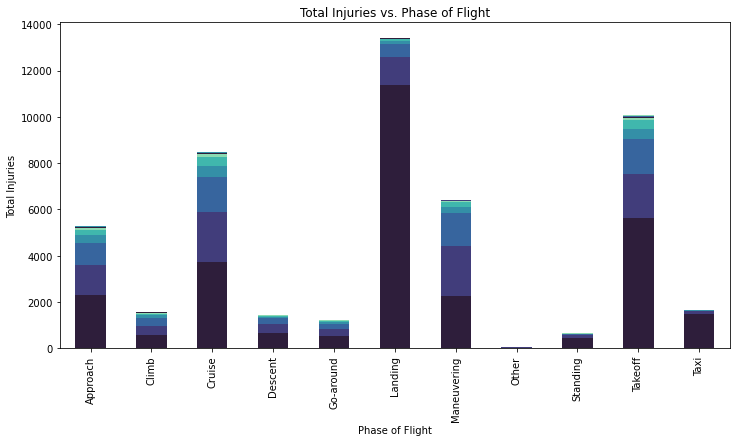

In [27]:
#plot injuries by phase of flight
noUNK = planes[planes['Phase_of_Flight'] != 'Unknown'] #remove unknowns from data

pohti = noUNK.groupby(['Phase_of_Flight', 'Total_Injuries']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize= (12, 6))

pohti.plot(kind = 'bar', stacked = True, ax = ax, legend = None);

plt.xlabel("Phase of Flight")
plt.ylabel("Total Injuries")
#plt.xticks(rotation = 45)
plt.title("Total Injuries vs. Phase of Flight");

#make 4 subplots?

## Aircraft Make by Injuries

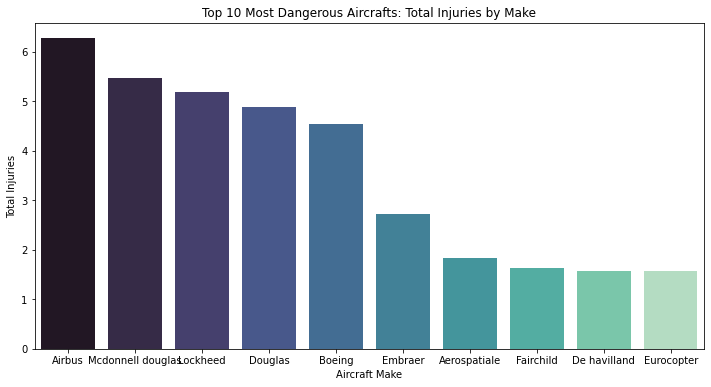

In [18]:
#most dangerous pivot table
Inj_Make_Pivot = pd.pivot_table(planesII, values = ['Total_Injuries'], index = 'Make')
sorted_IM_Pivot = Inj_Make_Pivot.apply(lambda x: x.sort_values(ascending = False).head(10))

#create dataframe from pivot table
DangerMake = {
    'Make': ['Airbus', 'Mcdonnell douglas', 'Lockheed', 'Douglas', 
             'Boeing', 'Embraer', 'Aerospatiale', 'Fairchild', 'De havilland', 'Eurocopter'],
    'Total_Injuries': [6.277978, 5.475379, 5.187500, 4.893939, 4.540573, 2.721212, 
                       1.843666, 1.632653, 1.577608, 1.564767]
}
plt.figure(figsize=(12,6))
sns.barplot(x = 'Make', y = 'Total_Injuries', data = DangerMake, palette = 'mako')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Injuries')
plt.title('Top 10 Most Dangerous Aircrafts: Total Injuries by Make');

#add values if easy

#combine the mcdonnell and douglas

Observations: Across the data, Airbus had the highest average injuries of 6.277
	the highest averages seem to be popular aircraft companies/larger airplanes. That may accounts for the skew for higher total average 
    	eurocopter = airbus but still in data? need clarification on what model is (cause for further investigation)


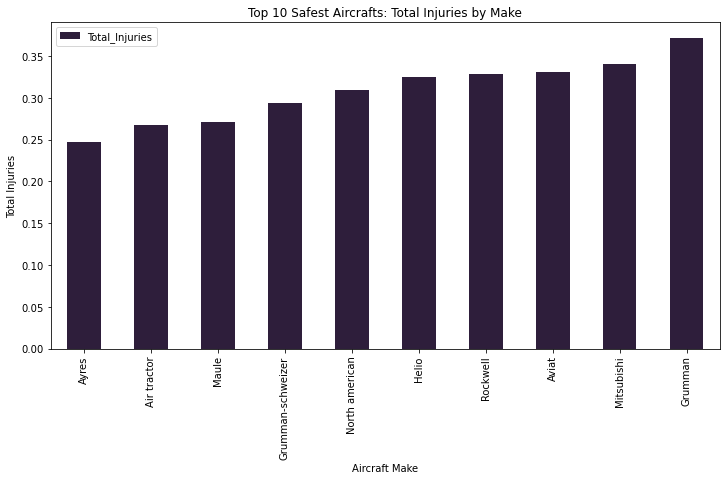

In [22]:
#least dangerous pivot table
least_injured = pd.pivot_table(planesII, values = ['Total_Injuries'], index = 'Make')
sorted_least_injured = least_injured.apply(lambda x: x.sort_values(ascending = True).head(10))
sorted_least_injured

#create dataframe from pivot table

least_inj_df = sorted_least_injured.reset_index()
least_inj_df = least_inj_df.set_index('Make')



fix, ax = plt.subplots(figsize=(12,6))
sns.set_palette = 'viridis'

least_inj_df.plot(kind = 'bar', stacked = False, ax = ax)

plt.xlabel('Aircraft Make')
plt.ylabel('Total Injuries')
plt.title('Top 10 Safest Aircrafts: Total Injuries by Make');
#plt.xticks(rotation=45);

Observations: 
    Grummen-schwelzer with the least amount of injuries
    difference between top 10 and bottom 10 is > 5 average injuries
    Air tractor = farming plane not passenger plane
    these aircraft companies could make smaller passenger planes overall which account for their low average injuries
    Some helicopter companies in the mix

## Aircraft Damage by Aircraft Make

In [24]:
#most dangerous pivot table
most_damage = pd.pivot_table(planesII, columns = ['Aircraft_Damage'], index = 'Make', aggfunc = 'size')

#damage_scores = pd.pivot_table(safety_scores, columns = ['Aircraft_Damage'], index = 'Make', aggfunc = 'size')

#convert to dataframe
most_damage_df = most_damage.reset_index()
most_damage_df = most_damage_df.set_index('Make')
most_damage_df[["Destroyed","Minor","Substantial"]] = most_damage_df[["Destroyed","Minor","Substantial"]].fillna(0)

#drop unknown column
#most_damage_df.drop(columns = 'Unknown', inplace = True)


#create top 10 and bottom 10


#normalize columns


#create normalized total column


#check
most_damage_df

Aircraft_Damage,Destroyed,Minor,Substantial
Make,,,
Aero commander,137.0,5.0,266.0
Aeronca,91.0,5.0,514.0
Aerospatiale,104.0,21.0,221.0
Air tractor,151.0,12.0,672.0
Airbus,7.0,30.0,32.0
Aviat,9.0,1.0,126.0
Ayres,65.0,4.0,154.0
Beech,1475.0,157.0,3373.0
Bell,617.0,44.0,1739.0


Text(0.5, 1.0, 'Aircraft Damage by Make')

<Figure size 864x576 with 0 Axes>

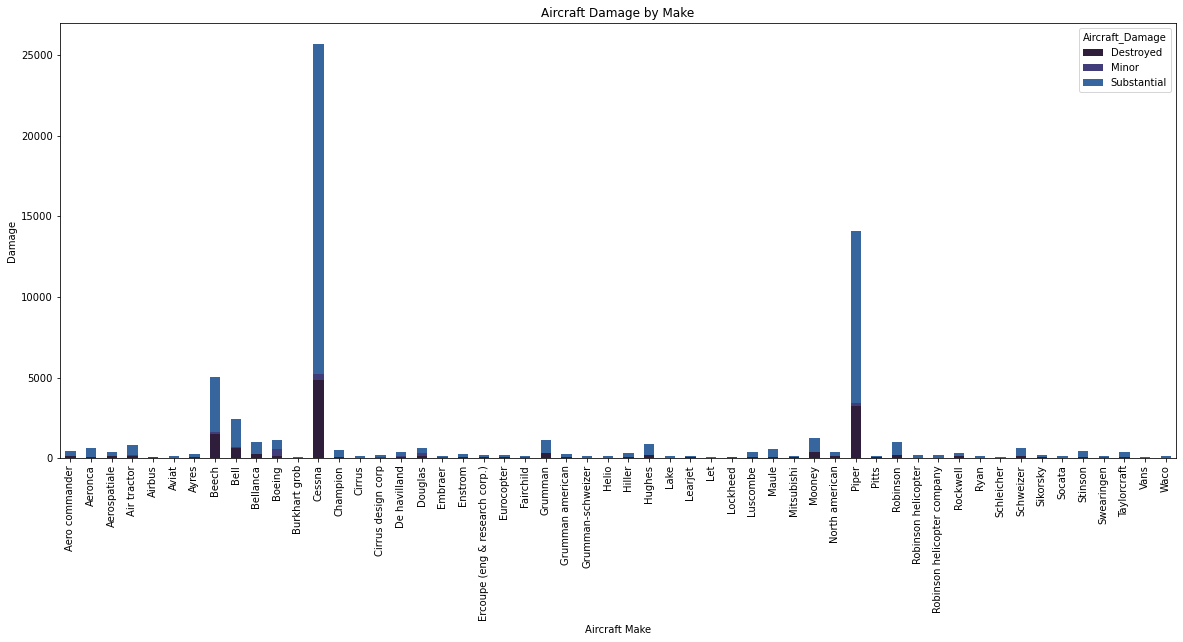

In [21]:
# plot 

plt.figure(figsize=(12,8))

ax = most_damage_df.plot(kind = 'bar', stacked = True, figsize = (20,8))
plt.xlabel('Aircraft Make')
plt.ylabel('Damage')
plt.title('Aircraft Damage by Make')
#sns.set_palette('mako');

#plt.xticks(rotation=45);

Observations:
    Cessna and Piper have the highest number of damage reports

# Safety Scoring

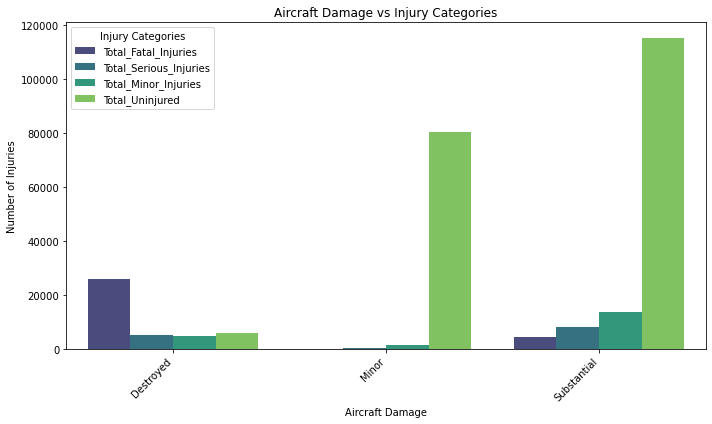

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

subset_columns = ['Aircraft_Damage', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']
df_subset = planes[subset_columns]

grouped_data = df_subset.groupby('Aircraft_Damage').sum().reset_index()

melted_data = pd.melt(grouped_data, id_vars='Aircraft_Damage', var_name='Injury Category', value_name='Number of Injuries')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='Aircraft_Damage', y='Number of Injuries', hue='Injury Category', palette='viridis')

plt.title('Aircraft Damage vs Injury Categories')
plt.xlabel('Aircraft Damage')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Injury Categories')
plt.tight_layout()
plt.show()